In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani

In [8]:
# constant from kuramoto
kuramoto_const = 0.08 # くらもと　ていす
n = 3  # number of Metronome
dt = 0.1  # time
time_end = 50 # end time of simulation

#initial thedas & omegas
initial_theda = [math.pi, math.pi/2, 0]
omega = [1,1,1] # natural oscillation freqency
color = ["chocolate", "forestgreen", "rebeccapurple"]

In [9]:
t = np.linspace(0,time_end,int(time_end/dt))
theda = initial_theda.copy()
thedas = []

def sinSum(theda, idx, n):
    temp = 0
    for i in range(n):
        temp += math.sin(theda[i]-theda[idx])
    return temp

for i in range(n):
    thedas.append([])

for i in range(int(time_end/dt)):
    
    for i in range(n):
        thedadot = omega[i] + kuramoto_const/n*sinSum(theda,i,n)
        theda[i] += thedadot * dt

    for i in range(n):
        thedas[i].append(theda[i])

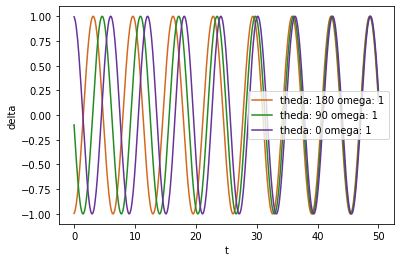

In [10]:
thedas = np.array(thedas)

plt.xlabel("t")
plt.ylabel("delta")
for i in range(n):
    plt.plot(t,np.cos(thedas[i]), label = "theda: {:.0f} omega: {}".format(initial_theda[i]/math.pi*180,omega[i]), color = color[i])

plt.legend()

MovieWriter ffmpeg unavailable; using Pillow instead.


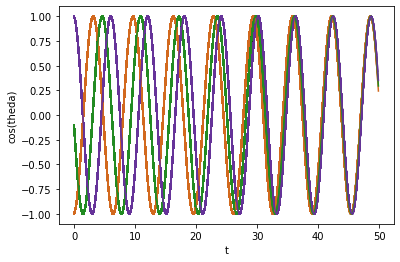

In [19]:
#animation 1
fig, ax = plt.subplots()

def update_linechart(i):
  ax.set_xlabel("t")
  ax.set_ylabel("cos(theda)")
  for j in range(n):
    ax.plot(t[0:i], np.cos(thedas[j][0:i]), color = color[j])

anim = ani.FuncAnimation(fig, update_linechart, frames = len(t), interval = 50)
anim.save('osc1.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


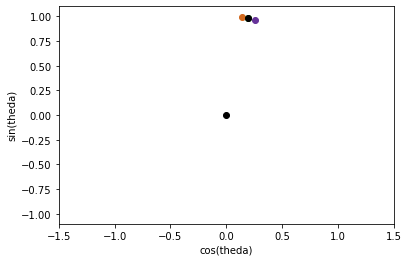

In [17]:
def avg(array, idx):
  sum = 0
  for i in range(n):
    sum += array[i][idx]
  return sum/n

#animation 2
fig2, ax2 = plt.subplots()

def update_polarchart(i):
  ax2.clear()
  ax2.set_xlim(-1.5,1.5)
  ax2.set_ylim(-1.1,1.1)
  ax2.set_xlabel("cos(theda)")
  ax2.set_ylabel("sin(theda)")
  for j in range(n):
    ax2.plot(np.cos(thedas[j][i]), np.sin(thedas[j][i]), "o", color = color[j], lw = 50)
  ax2.plot(0,0, "o", color = "black", lw = 2)
  ax2.plot(avg(np.cos(thedas), i),avg(np.sin(thedas), i), "o", color = "black", lw = 50)

anim2 = ani.FuncAnimation(fig2, update_polarchart, frames = len(thedas[0]), interval = 50)
anim2.save('osc2.gif')